In [92]:
from sys import stdin
import numpy as np # linear algebra
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import metrics

# Load the data
data = pd.read_csv("FlightDelays.csv")

print("The number of rows in the data set is {}.".format(len(data)))
print("The number of features is {}.".format(len(data.columns)))

data.head()

The number of rows in the data set is 450017.
The number of features is 12.


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,SCHED_DEP_TIME,SCHED_ARR_TIME,DELAY
0,2017,1,1,7,6,19805,1766,11298,12889,1055,1154,0.0
1,2017,1,1,8,7,19805,1766,11298,12889,1055,1154,0.0
2,2017,1,1,1,7,19805,1766,13930,11298,710,948,0.0
3,2017,1,1,2,1,19805,1766,13930,11298,710,948,0.0
4,2017,1,1,3,2,19805,1766,13930,11298,710,948,0.0


In [3]:
# Finding Null Values
data.isnull().sum()

YEAR                    0
QUARTER                 0
MONTH                   0
DAY_OF_MONTH            0
DAY_OF_WEEK             0
AIRLINE_ID              0
FL_NUM                  0
ORIGIN_AIRPORT_ID       0
DEST_AIRPORT_ID         0
SCHED_DEP_TIME          0
SCHED_ARR_TIME          0
DELAY                8541
dtype: int64

In [93]:
new_data = data.dropna(axis=0)#Delete the rows containing missing data
new_data.isnull().sum() #Check to make sure there are no more NaNs

YEAR                 0
QUARTER              0
MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
AIRLINE_ID           0
FL_NUM               0
ORIGIN_AIRPORT_ID    0
DEST_AIRPORT_ID      0
SCHED_DEP_TIME       0
SCHED_ARR_TIME       0
DELAY                0
dtype: int64

In [154]:
data = new_data
print("The number of rows in the new data set is {}.".format(len(data)))

The number of rows in the new data set is 441476.


In [155]:
#Average number of flights per day
len(data[data['YEAR']==2017].index)/365

1209.5232876712328

In [170]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'count': group.count(), 'mean': group.mean()}

# Creation of a dataframe with statitical infos on each airline:
global_stats = data['DELAY'].groupby(data['AIRLINE_ID']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,count,mean
AIRLINE_ID,,
21171,5648.0,0.296742
19690,6258.0,0.097795
20436,7603.0,0.269630
20416,12140.0,0.222323
19930,14469.0,0.165112
20409,24088.0,0.256020
20366,33917.0,0.235369
19977,42192.0,0.218217
20304,48366.0,0.223070


In [158]:
#subset the flight that delayed
delay_flight=new_data[new_data.DELAY==1]
print("The number of delayed flights in the data set is {}.".format(len(delay_flight)))

The number of delayed flights in the data set is 93072.


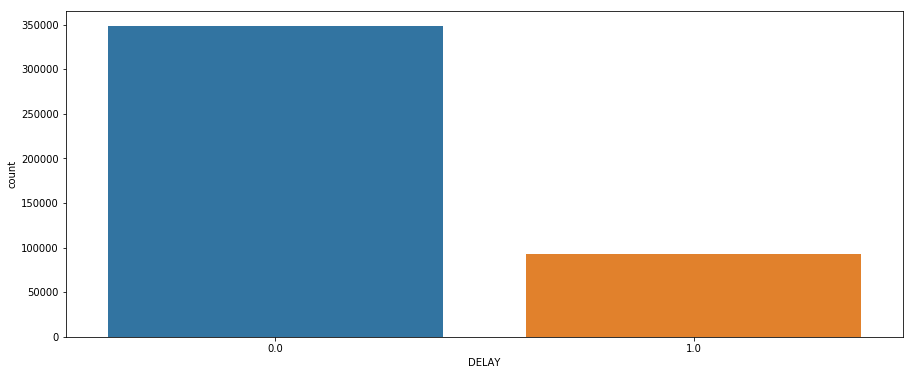

This figure represents the proportion of on time flights (0) and delayed flights (1) of all data set.


In [215]:
#Plotting the proportion of on time flights (0) and delayed flights (1) of all data set.

import seaborn as sns

f,axes = plt.subplots(1,1,figsize=(15,6))
sns.countplot('DELAY',order = data['DELAY'].value_counts().index, data=data,axes=axes)
plt.show()

print('This figure represents the proportion of on time flights (0) and delayed flights (1) of all data set.')

In [162]:
#exploring most five origin airport delay 
most5origin_Airport_delay=delay_flight.groupby('ORIGIN_AIRPORT_ID').DELAY.sum().nlargest(5)
print(most5origin_Airport_delay)

#exploring most five destenation airport delay 
most5dest_Airport_delay=delay_flight.groupby('DEST_AIRPORT_ID').DELAY.sum().nlargest(5)
print(most5dest_Airport_delay)


ORIGIN_AIRPORT_ID
10397    6176.0
12892    5453.0
13930    4202.0
11292    4179.0
14771    3831.0
Name: DELAY, dtype: float64
DEST_AIRPORT_ID
10397    5289.0
12892    4341.0
14771    4083.0
11292    3563.0
13930    3536.0
Name: DELAY, dtype: float64


In [164]:
#cleaning data keeping only most five origin airport delay 
data_5most_airport=new_data.loc[new_data['ORIGIN_AIRPORT_ID'].isin(['10397', '12892', '13930','11292','14771'])] 
print("The number of rows keeping only most five origin airport delay is {}.".format(len(data_5most_airport)))

The number of rows keeping only most five airport delay is 94627.


In [166]:
#cleaning data keeping the most five dest airport delay 
most5Dest_airport=most5Origin_airport.loc[new_data['DEST_AIRPORT_ID'].isin(['10397', '12892', '13930','11292','14771'])] 
print("The number of rows keeping only most five dest airport delay is {}.".format(len(most5Dest_airport)))

The number of rows keeping only most five dest airport delay is 11381.


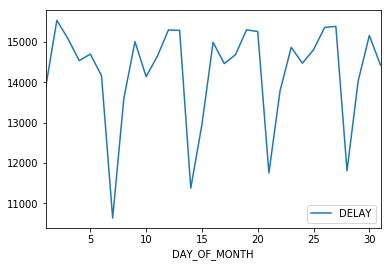

In [168]:
data[['DAY_OF_MONTH','DELAY']].groupby(['DAY_OF_MONTH']).count().plot()
plt.show()

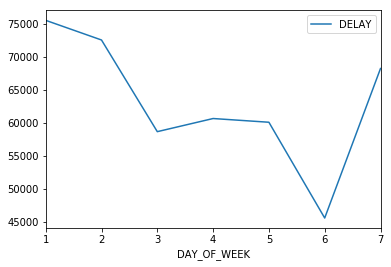

In [169]:
data[['DAY_OF_WEEK','DELAY']].groupby(['DAY_OF_WEEK']).count().plot()
plt.show()

In [73]:
#In the dataset, dates are coded according to 4 variables: YEAR, QUARTER, DAY_OF_MONTH, and DAY_OF_WEEK. 
#Python offers datetime format which is really convenient to work with dates and times

data['DATE'] = pd.to_datetime(data[['YEAR','MONTH', 'DAY_OF_MONTH']])

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day] is missing

In [205]:
#Read the Airline Code Description CSV file for full names of the Airlines
Airline_key = pd.read_csv('Airlines.csv')
Airline_key.head()

,Code,Description
0,19031,Mackey International Inc.: MAC
1,19032,Munz Northern Airlines Inc.: XY
2,19033,Cochise Airlines Inc.: COC
3,19034,Golden Gate Airlines Inc.: GSA
4,19035,Aeromech Inc.: RZZ


In [204]:
Airline_key.rename(columns={'Code': 'AIRLINE_ID'}, inplace=True)
Airline_key.head()

,AIRLINE_ID,Description
0,19031,Mackey International Inc.: MAC
1,19032,Munz Northern Airlines Inc.: XY
2,19033,Cochise Airlines Inc.: COC
3,19034,Golden Gate Airlines Inc.: GSA
4,19035,Aeromech Inc.: RZZ


In [184]:
merged = pd.merge (data, Airline_key, on ='AIRLINE_ID', how = 'inner')
merged.set_index ('AIRLINE_ID', inplace=True)
merged.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,SCHED_DEP_TIME,SCHED_ARR_TIME,DELAY,Description
AIRLINE_ID,,,,,,,,,,,,
19805,2017,1,1,7,6,1766,11298,12889,1055,1154,0.0,American Airlines Inc.: AA
19805,2017,1,1,8,7,1766,11298,12889,1055,1154,0.0,American Airlines Inc.: AA
19805,2017,1,1,1,7,1766,13930,11298,710,948,0.0,American Airlines Inc.: AA
19805,2017,1,1,2,1,1766,13930,11298,710,948,0.0,American Airlines Inc.: AA
19805,2017,1,1,3,2,1766,13930,11298,710,948,0.0,American Airlines Inc.: AA


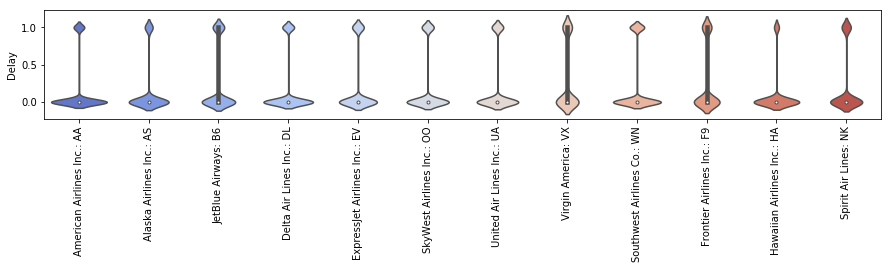

In [200]:
#Create the plot in seaborn, Delays are clubbed to show the data at the same scale
plt.figure(figsize=(15, 2))
g = sns.violinplot(x="Description", y="DELAY", data=merged,palette="coolwarm")
g.set_ylabel('Delay')
g.set_xlabel('')
label = g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()